In [2]:
# Create a new notebook: notebooks/03_data_visualization.ipynb

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style for professional-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load our processed data
df = pd.read_csv("../data/processed/ai_ready_customer_data.csv")

print("Data Visualization: Understanding Patterns for AI")
print("=" * 50)

Data Visualization: Understanding Patterns for AI



1. Distribution Analysis:


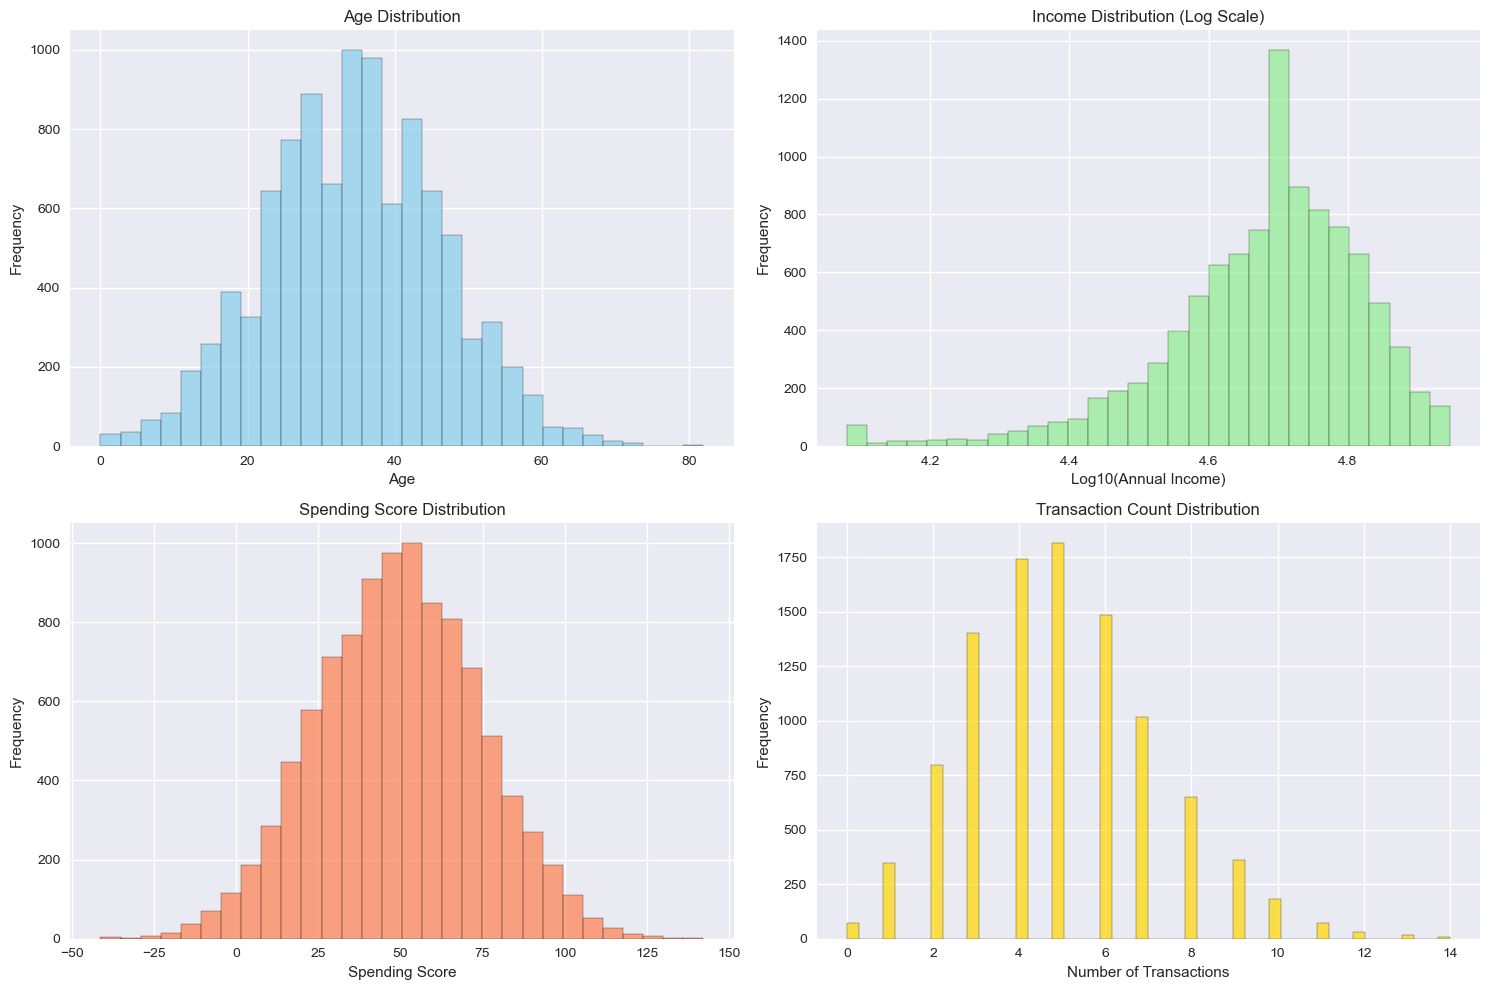

Distribution Insights:
Age range: 0-82 years
Income range: $12,028-$88,373
Average transactions per customer: 5.0


In [3]:
# 1. Distribution Analysis - Understanding Your Data
print("\n1. Distribution Analysis:")

# Create subplot figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution
axes[0, 0].hist(df['age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Income distribution (log scale due to wide range)
axes[0, 1].hist(np.log10(df['annual_income']), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Income Distribution (Log Scale)')
axes[0, 1].set_xlabel('Log10(Annual Income)')
axes[0, 1].set_ylabel('Frequency')

# Spending score distribution
axes[1, 0].hist(df['spending_score'], bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[1, 0].set_title('Spending Score Distribution')
axes[1, 0].set_xlabel('Spending Score')
axes[1, 0].set_ylabel('Frequency')

# Transaction count distribution
axes[1, 1].hist(df['transaction_count'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('Transaction Count Distribution')
axes[1, 1].set_xlabel('Number of Transactions')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Statistical insights
print("Distribution Insights:")
print(f"Age range: {df['age'].min()}-{df['age'].max()} years")
print(f"Income range: ${df['annual_income'].min():,.0f}-${df['annual_income'].max():,.0f}")
print(f"Average transactions per customer: {df['transaction_count'].mean():.1f}")


2. Correlation Analysis:


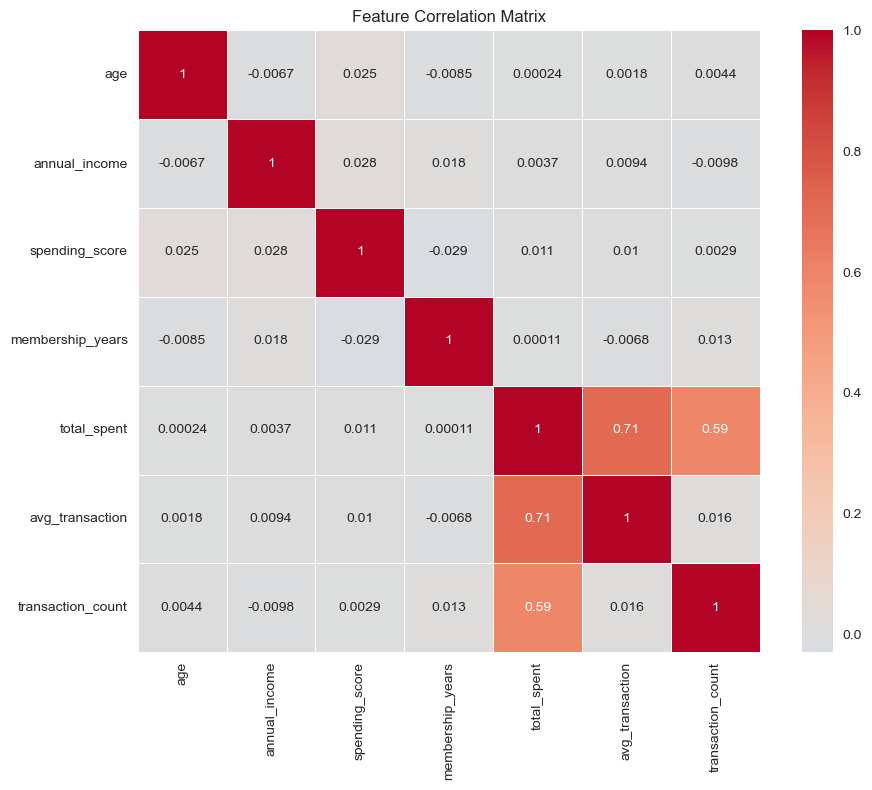

Strong Correlations (|r| > 0.5):
total_spent ↔ avg_transaction: 0.711
total_spent ↔ transaction_count: 0.592


In [4]:
# 2. Correlation Analysis - Finding Relationships
print("\n2. Correlation Analysis:")

# Select numerical columns for correlation
numerical_cols = ['age', 'annual_income', 'spending_score', 'membership_years', 
                 'total_spent', 'avg_transaction', 'transaction_count']

correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Identify strong correlations
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:  # Strong correlation threshold
            strong_correlations.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                corr_value
            ))

print("Strong Correlations (|r| > 0.5):")
for var1, var2, corr in strong_correlations:
    print(f"{var1} ↔ {var2}: {corr:.3f}")


3. Categorical Data Analysis:


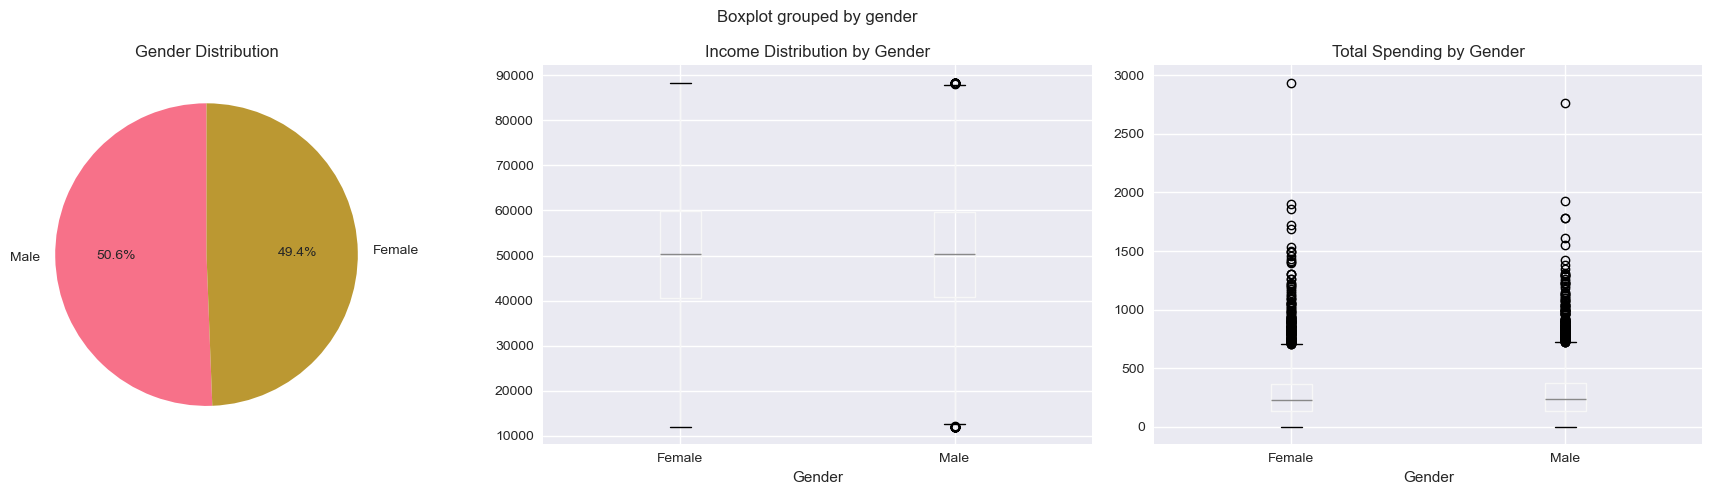

<Figure size 1200x600 with 0 Axes>

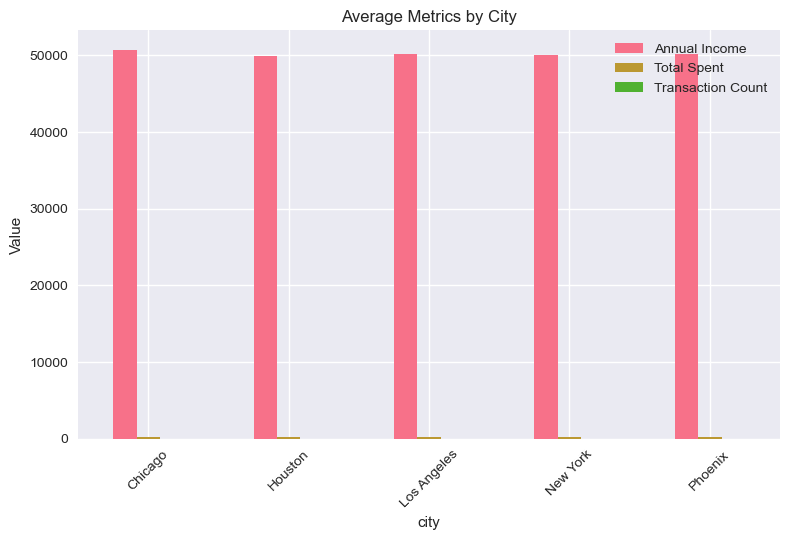

City Analysis Summary:
             annual_income  total_spent  transaction_count
city                                                      
Chicago           50728.09       277.14               5.05
Houston           49888.54       272.31               4.96
Los Angeles       50124.21       268.70               4.97
New York          50088.65       279.80               5.06
Phoenix           50246.42       276.38               4.96


In [5]:
# 3. Categorical Analysis - Understanding Groups
print("\n3. Categorical Data Analysis:")

# Gender-based analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender distribution
gender_counts = df['gender'].value_counts()
axes[0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Gender Distribution')

# Income by gender
df.boxplot(column='annual_income', by='gender', ax=axes[1])
axes[1].set_title('Income Distribution by Gender')
axes[1].set_xlabel('Gender')

# Spending by gender
df.boxplot(column='total_spent', by='gender', ax=axes[2])
axes[2].set_title('Total Spending by Gender')
axes[2].set_xlabel('Gender')

plt.tight_layout()
plt.show()

# City-based analysis
plt.figure(figsize=(12, 6))
city_metrics = df.groupby('city').agg({
    'annual_income': 'mean',
    'total_spent': 'mean',
    'transaction_count': 'mean'
}).round(2)

city_metrics.plot(kind='bar')
plt.title('Average Metrics by City')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(['Annual Income', 'Total Spent', 'Transaction Count'])
plt.tight_layout()
plt.show()

print("City Analysis Summary:")
print(city_metrics)


4. Advanced Visualization Techniques:


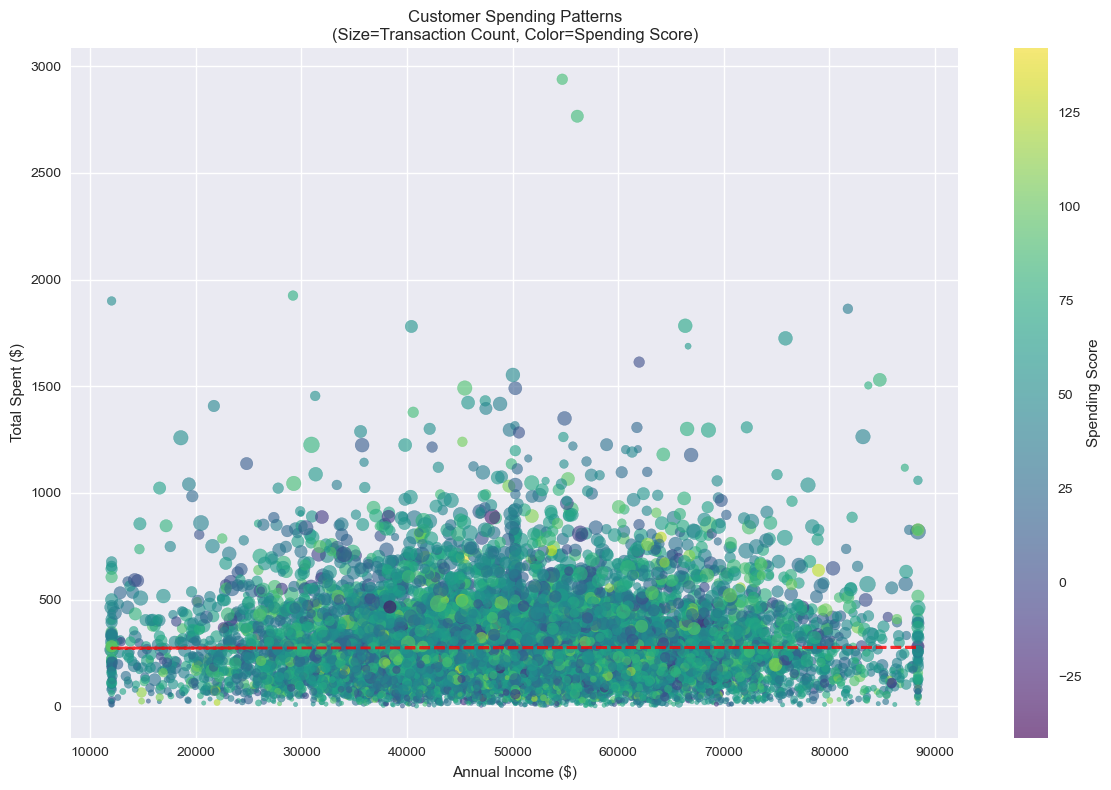

/var/folders/7r/97vw1q7x18x8btt349jvjpvc0000gn/T/ipykernel_50025/3547490616.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = df.groupby(['income_quartile', 'spending_quartile']).size().unstack(fill_value=0)


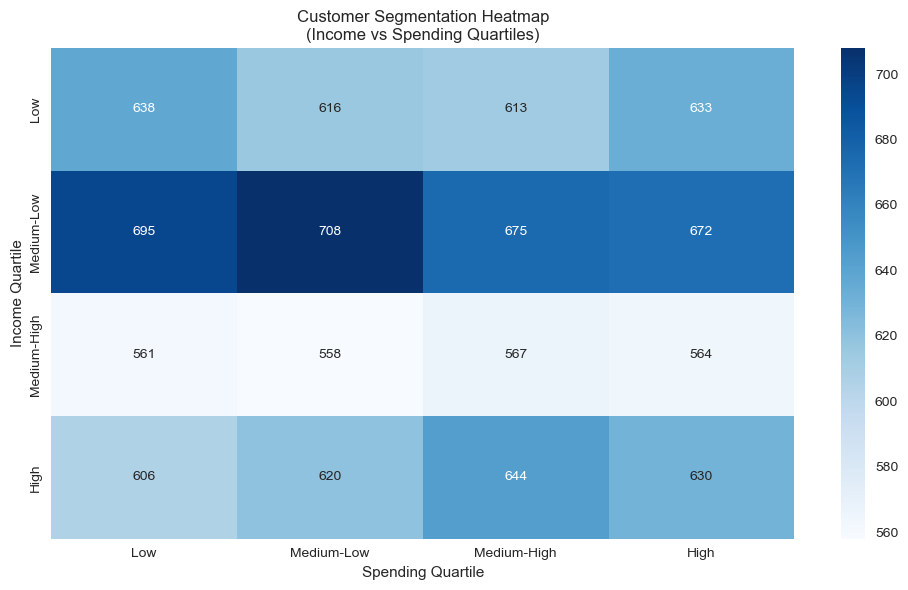

Customer Segments:
spending_quartile  Low  Medium-Low  Medium-High  High
income_quartile                                      
Low                638         616          613   633
Medium-Low         695         708          675   672
Medium-High        561         558          567   564
High               606         620          644   630


In [6]:
# 4. Advanced Visualizations - AI Model Insights
print("\n4. Advanced Visualization Techniques:")

# Scatter plot with multiple dimensions
plt.figure(figsize=(12, 8))

# Create scatter plot with size and color encoding
scatter = plt.scatter(df['annual_income'], df['total_spent'], 
                     s=df['transaction_count']*10,  # Size represents transaction count
                     c=df['spending_score'],        # Color represents spending score
                     alpha=0.6, cmap='viridis')

plt.xlabel('Annual Income ($)')
plt.ylabel('Total Spent ($)')
plt.title('Customer Spending Patterns\n(Size=Transaction Count, Color=Spending Score)')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Spending Score')

# Add trend line
z = np.polyfit(df['annual_income'], df['total_spent'], 1)
p = np.poly1d(z)
plt.plot(df['annual_income'], p(df['annual_income']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Customer segmentation visualization (preparing for AI clustering)
plt.figure(figsize=(10, 6))

# Create customer segments based on spending and income
df['income_quartile'] = pd.qcut(df['annual_income'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
df['spending_quartile'] = pd.qcut(df['total_spent'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

segment_summary = df.groupby(['income_quartile', 'spending_quartile']).size().unstack(fill_value=0)
sns.heatmap(segment_summary, annot=True, fmt='d', cmap='Blues')
plt.title('Customer Segmentation Heatmap\n(Income vs Spending Quartiles)')
plt.ylabel('Income Quartile')
plt.xlabel('Spending Quartile')
plt.tight_layout()
plt.show()

print("Customer Segments:")
print(segment_summary)